In [ ]:
%pip install python-chess  
%pip install --upgrade git+https://github.com/arjangroen/RLC.git  

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/arjangroen/RLC.git to c:\users\hp\appdata\local\temp\pip-req-build-gnqe7tol
  Resolved https://github.com/arjangroen/RLC.git to commit e54eb7380875f64fd06106c59aa376b426d9e5ca
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/arjangroen/RLC.git 'C:\Users\HP\AppData\Local\Temp\pip-req-build-gnqe7tol'

[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
from RLC.move_chess.environment import Board
from RLC.move_chess.agent import Piece
from RLC.move_chess.learn import Reinforce

# initialize the environment, agent, and reinforcement learning algorithm
env = Board()
p = Piece(piece='king')
r = Reinforce(p, env)

# env.
# train the agent using the policy iteration algorithm
r.policy_iteration(gamma=0.9, eps=0.01, synchronous=True)
#render the policy
r.visualize_policy()





______iteration: 1 ______

 policy:
[['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', 'F', '↑', '↑']]

Value function for this policy:
[[-10 -10 -10 -10 -10 -10 -10 -10]
 [-10 -10 -10 -10 -10 -10 -10 -10]
 [-10 -10 -10 -10 -10  -9  -9  -9]
 [-10 -10  -9  -9  -9  -9  -9  -9]
 [-10  -9  -9  -9  -9  -9  -9  -9]
 [ -9  -9  -9  -9  -9  -8  -8  -9]
 [ -9  -9  -9  -9  -7  -7  -7  -8]
 [ -9  -9  -9  -8  -7   0  -7  -8]]

 Improving policy:
policy diff: False


______iteration: 2 ______

 policy:
[['↘', '↘', '↘', '↘', '↘', '↘', '↓', '↙'],
 ['↘', '↘', '↘', '↘', '↘', '↘', '↓', '↙'],
 ['↘', '↘', '↘', '↘', '↘', '↘', '↓', '↙'],
 ['↘', '↘', '↘', '↘', '↘', '↘', '↓', '↙'],
 ['↘', '↘', '↘', '↘', '↘', '↓', '↙', '↙'],
 ['↘', '↘', 

In [ ]:
r.improve_policy()
r.visualize_policy()

[['↘', '↘', '↘', '↘', '↘', '↘', '↘', '↓'],
 ['↘', '↘', '↘', '↘', '↘', '↘', '↘', '↓'],
 ['↘', '↘', '↘', '↘', '↘', '↘', '↘', '↓'],
 ['→', '↘', '↘', '↘', '↘', '↘', '↘', '↓'],
 ['↗', '→', '↘', '↘', '↘', '↘', '↘', '↓'],
 ['↗', '↗', '→', '↘', '↘', '↘', '↓', '↙'],
 ['↗', '↗', '↗', '→', '↘', '↓', '↙', '↙'],
 ['↗', '↗', '↗', '↗', '→', 'F', '←', '←']]


In [ ]:
r.evaluate_policy()
r.visualize_policy()


[['↘', '↘', '↘', '↘', '↘', '↘', '↘', '↓'],
 ['↘', '↘', '↘', '↘', '↘', '↘', '↘', '↓'],
 ['↘', '↘', '↘', '↘', '↘', '↘', '↘', '↓'],
 ['→', '↘', '↘', '↘', '↘', '↘', '↘', '↓'],
 ['↗', '→', '↘', '↘', '↘', '↘', '↘', '↓'],
 ['↗', '↗', '→', '↘', '↘', '↘', '↓', '↙'],
 ['↗', '↗', '↗', '→', '↘', '↓', '↙', '↙'],
 ['↗', '↗', '↗', '↗', '→', 'F', '←', '←']]


**Model Free Methods**

In [ ]:
import numpy as np
import pandas as pd
import inspect

from RLC.move_chess.environment import Board
from RLC.move_chess.agent import Piece
from RLC.move_chess.learn import Reinforce

# create a chess board environment and display it
env = Board()
env.render()
print(env.visual_board)

# create a reinforcement learning agent for the king piece using Monte Carlo learning
p = Piece(piece='king')
r = Reinforce(p, env)

# perform 100 episodes of Monte Carlo learning with epsilon-greedy exploration
for k in range(100):
    eps = 0.5
    r.monte_carlo_learning(epsilon=eps)

# visualize the learned policy
r.visualize_policy()

# print the learned action function as integers
print(r.agent.action_function.max(axis=2).astype(int))

# display the source code of the SARSA TD learning method
print(inspect.getsource(r.sarsa_td))

# visualize the learned policy using SARSA TD learning
r.visualize_policy()

# display the source code of the SARSA(lambda) learning method
print(inspect.getsource(r.sarsa_lambda))

# visualize the learned policy using SARSA(lambda) learning
r.visualize_policy()

# create a new reinforcement learning agent for the king piece using Q-learning
p = Piece(piece='king')
env = Board()
r = Reinforce(p, env)

# train the agent using Q-learning for 1000 episodes with a learning rate of 0.2 and a discount factor of 0.9
r.q_learning(n_episodes=1000, alpha=0.2, gamma=0.9)

# visualize the learned policy
r.visualize_policy()

# print the learned action function as integers
print(r.agent.action_function.max(axis=2).round().astype(int))


[['[S]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'], ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'], ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'], ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'], ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'], ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'], ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'], ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[F]', '[ ]', '[ ]']]
[['←', '→', '↓', '→', '↓', '↘', '←', '←'],
 ['↙', '↓', '↗', '←', '↘', '↘', '←', '↘'],
 ['→', '↓', '↓', '↘', '↘', '↗', '↙', '↖'],
 ['↘', '↑', '↙', '↗', '↘', '↙', '↗', '↖'],
 ['↖', '↘', '←', '→', '↓', '↓', '↙', '→'],
 ['↑', '↑', '↗', '↘', '↘', '↓', '↖', '↗'],
 ['↗', '↑', '↗', '↖', '↘', '↓', '↙', '↖'],
 ['↘', '↘', '↑', '↘', '→', 'F', '←', '→']]
[[-58 -49 -43 -51 -53 -44 -44 -71]
 [-52 -40 -49 -49 -44 -30 -39 -41]
 [-84 -50 -56 -23 -39 -37 -19 -33]
 [-29 -45 -40 -31 -15 -13 -46 -50]
 [-48 -23 -39 -15 -10  -8  -9 -24]
 [-27 -22 -18  -

**Q-Networks**

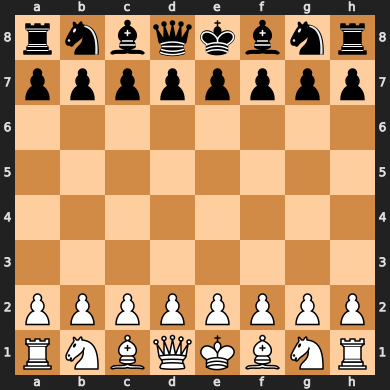

In [ ]:
import numpy as np
import pandas as pd
import os
import inspect
import chess
from chess.pgn import Game
import RLC

from RLC.capture_chess.environment import Board
from RLC.capture_chess.learn import Q_learning
from RLC.capture_chess.agent import Agent

chess_board = Board()
chess_board.board


In [ ]:
chess_board.layer_board[0,::-1,:].astype(int)


array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 board_layer (InputLayer)       [(None, 8, 8, 8)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 1, 8, 8)      9           ['board_layer[0][0]']            
                                                                                                  
 conv2d_1 (Conv2D)              (None, 1, 8, 8)      9           ['board_layer[0][0]']            
                                                                                                  
 reshape (Reshape)              (None, 1, 64)        0           ['conv2d[0][0]']                 
                                                                                              

,_,p,n,b,r,q
P,0.0,0.0,0.0,0.0,0.087615,0.0
N,0.0,0.0,0.0,0.0,0.119917,0.0
B,0.0,0.0,0.0,0.0,-0.162712,0.0
R,0.0,0.0,0.0,0.0,-0.008024,0.0
Q,0.0,0.0,0.0,0.0,-0.040480,0.0
K,0.0,0.0,0.0,0.0,0.178844,0.0


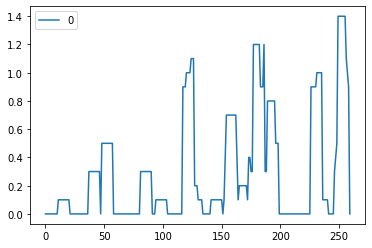

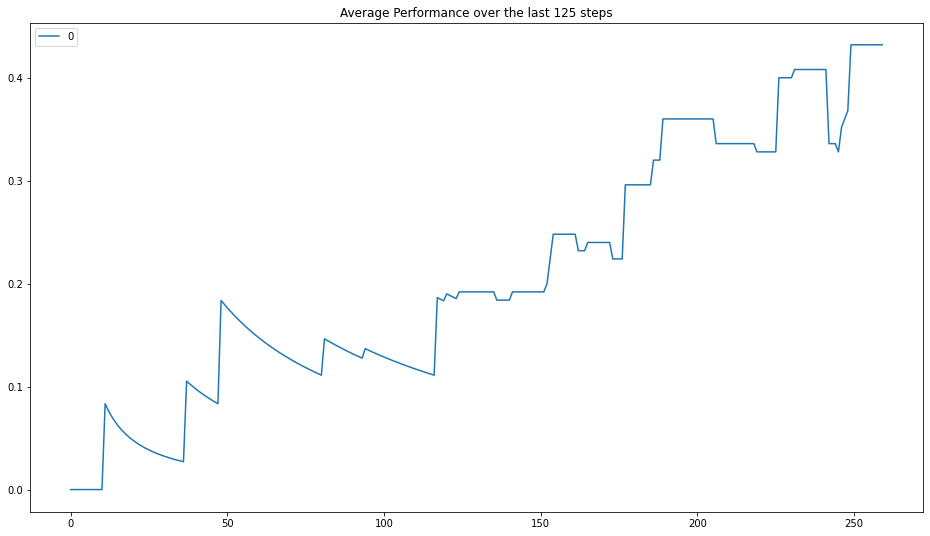

In [ ]:
chess_agent = Agent(network='conv', gamma=0.1, lr=0.07)
RL = Q_learning(chess_agent, chess_board)
chess_agent.fix_model()
chess_agent.model.summary()

pgn = RL.learn(iters=10)

reward_trace_smooth = pd.DataFrame(RL.reward_trace)
reward_trace_smooth.rolling(window=125, min_periods=0).mean().plot(figsize=(16,9), title='Average Performance over the last 125 steps')

with open("final_game.pgn", "w") as log:
    log.write(str(pgn))

chess_board.reset()
chess_layer_board = chess_board.layer_board
chess_layer_board[6,:,:] = 1/10
action_values = chess_agent.get_action_values(np.expand_dims(chess_layer_board, axis=0))
action_values = action_values.reshape((64,64))

chess_piece = chess_board.board.piece_at(20)

white_pieces = ['P', 'N', 'B', 'R', 'Q', 'K']
black_pieces = ['_', 'p', 'n', 'b', 'r', 'q', 'k']

df = pd.DataFrame(np.zeros((6, 7)))
df.index = white_pieces
df.columns = black_pieces

for from_square in range(16):
    for to_square in range(30, 64):
        from_piece = chess_board.board.piece_at(from_square).symbol()
        to_piece = chess_board.board.piece_at(to_square)
        if to_piece:
            to_piece = to_piece.symbol()
        else:
            to_piece = '_'
    df.loc[from_piece, to_piece] = action_values[from_square, to_square]

df[['_', 'p', 'n', 'b', 'r', 'q']]

In [ ]:
chess_board.board
chess_board.layer_board[0,::-1,:].astype(int)


array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

**Policy Gradient**

Instructions for updating:
non-resource variables are not supported in the long term


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


<AxesSubplot:>

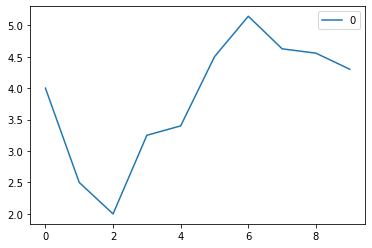

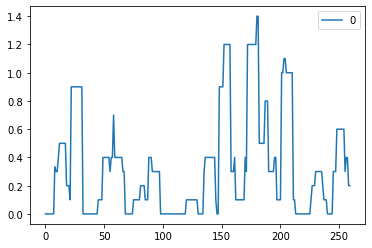

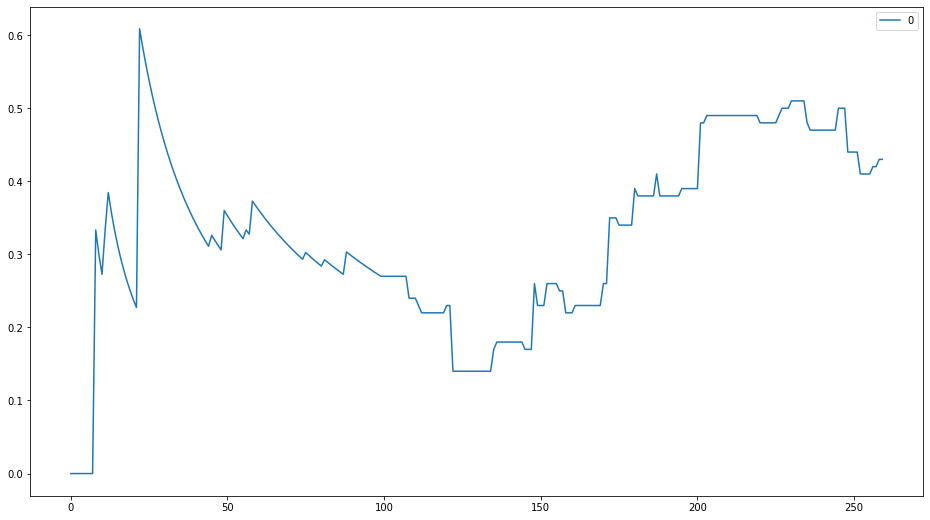

In [ ]:
import numpy as np
import pandas as pd
import chess
from chess.pgn import Game

from RLC.capture_chess.environment import Board
from RLC.capture_chess.learn import Reinforce, ActorCritic
from RLC.capture_chess.agent import Agent, policy_gradient_loss
# from tensorflow.python.framework.ops import disable_eager_execution

# disable_eager_execution()
import tensorflow._api.v2.compat.v1 as tf

tf.disable_v2_behavior()
board_env = Board()
agent_pg = Agent(network='conv_pg', lr=0.3)
reinforce_algo = Reinforce(agent_pg, board_env)

pgn = reinforce_algo.learn(iters=10)

with open("final_game.pgn", "w") as f:
    f.write(str(pgn))

board_env = Board()

critic_agent = Agent(network='conv', lr=0.1)
critic_agent.fix_model()
actor_agent = Agent(network='conv_pg', lr=0.3)

actor_critic_algo = ActorCritic(actor_agent, critic_agent, board_env)

pgn = actor_critic_algo.learn(iters=10)

reward_smooth = pd.DataFrame(actor_critic_algo.reward_trace)
reward_smooth.rolling(window=100, min_periods=0).mean().plot(figsize=(16, 9))



**Tree Search**

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 state (InputLayer)             [(None, 8, 8, 8)]    0           []                               
                                                                                                  
 conv2d_15 (Conv2D)             (None, 8, 8, 4)      36          ['state[0][0]']                  
                                                                                                  
 conv2d_16 (Conv2D)             (None, 7, 7, 8)      264         ['state[0][0]']                  
                                                                                                  
 conv2d_17 (Conv2D)             (None, 3, 3, 12)     876         ['state[0][0]']                  
                                                                                            

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


game ended with result 0.0 and material balance -24.0 in 81 halfmoves
game ended with result 0.0 and material balance -25.0 in 81 halfmoves
game ended with result 0.0 and material balance -16.0 in 81 halfmoves
game ended with result 0.0 and material balance -10.0 in 81 halfmoves
game ended with result 0.0 and material balance -31.0 in 81 halfmoves
game ended with result 0.0 and material balance -22.0 in 81 halfmoves
game ended with result 0.0 and material balance -10.0 in 81 halfmoves
game ended with result 0.0 and material balance -14.0 in 81 halfmoves
game ended with result 0.0 and material balance -18.0 in 81 halfmoves
game ended with result -1.0 and material balance -21.0 in 54 halfmoves


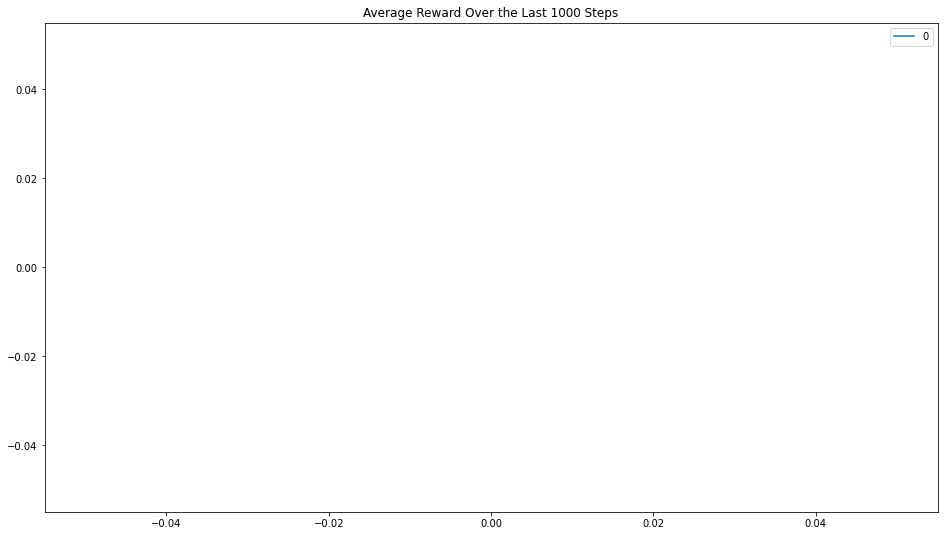

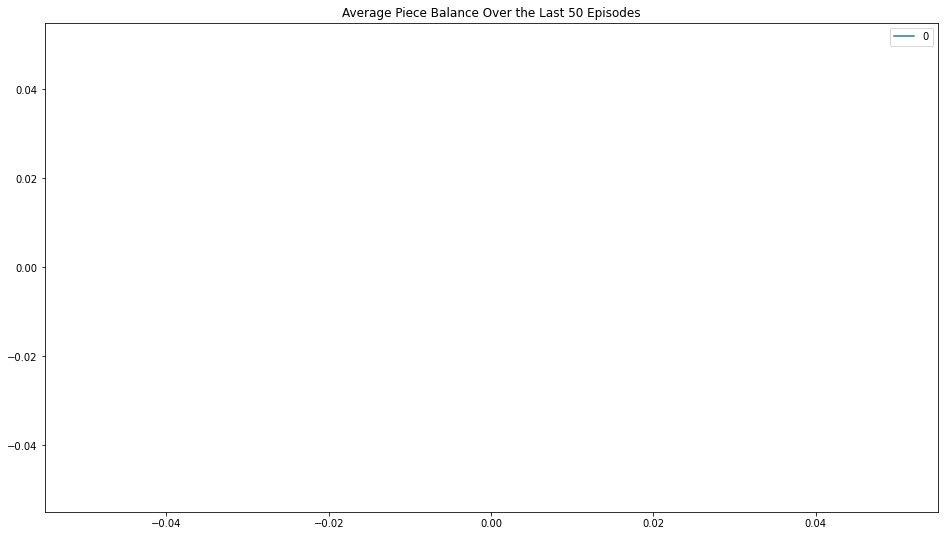

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model

from RLC.real_chess import agent as rlca, environment as rlce, learn as rlcl, tree as rlc_tree

import chess
from chess.pgn import Game

opponent_agent = rlca.GreedyAgent()
env_board = rlce.Board(opponent_agent, FEN=None)
learning_agent = rlca.Agent(lr=0.0005,network='big')
learner = rlcl.TD_search(env_board, learning_agent, gamma=0.9, search_time=0.9)
node = rlc_tree.Node(learner.env.board, gamma=learner.gamma)

learning_agent.model.summary()

n_iterations = 10
time_limit = 3600
network_update_interval = 10

learner.learn(iters=n_iterations, timelimit_seconds=time_limit, c=network_update_interval)

reward_smooth = pd.DataFrame(learner.reward_trace)
reward_smooth.rolling(window=1000, min_periods=1000).mean().plot(figsize=(16,9), title='Average Reward Over the Last 1000 Steps')
plt.show()

piece_balance_smooth = pd.DataFrame(learner.piece_balance_trace)
piece_balance_smooth.rolling(window=50, min_periods=50).mean().plot(figsize=(16,9), title='Average Piece Balance Over the Last 50 Episodes')
plt.show()

learner.env.reset()
learner.search_time = 60
learner.temperature = 1/3

learner.play_game(n_iterations, maxiter=10)



game ended with result 0.0 and material balance 9.0 in 99 halfmoves


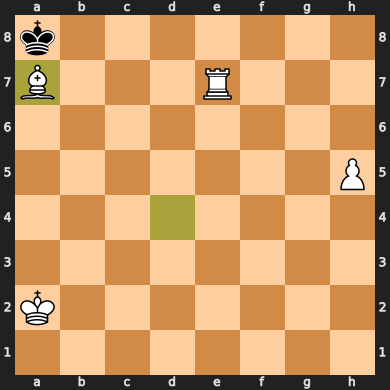

In [ ]:
pgn = Game.from_board(learner.env.board)
with open("rlc_pgn", "w") as log:
    log.write(str(pgn))

learning_agent.model.save('RLC_model.h5')
